In [1]:
import functools
import numpy as np
from matplotlib import pyplot
from sklearn.decomposition import IncrementalPCA


if "DIR_CHANGED" not in locals():
    import os
    import sys
    sys.path.append("..")
    os.chdir("..")
    print(f"Working directory is: {os.getcwd()}")
    DIR_CHANGED = True

from src.settings import *
from src.misc import pllmap
from src.dataset import Dataset
from src.image import get_feature_image
from src.dimension_reduction import get_training_data_for_model, generate_image, get_feature_image_inv, get_reducted_image

Dataset.init()

Working directory is: /home/pablo/dev/celeba-features


In [2]:
def get_training_data_for_model_unbalanced(feature):
    print("   %s, máximo de imágenes a cargar: %d" % (feature, MAX_MODEL_TRAINING_SAMPLES))
    mixed_cases = Dataset.get_feature_cases (feature, Dataset.SUBSET_TRAINING, None, MAX_MODEL_TRAINING_SAMPLES)
    
    print("   Se generará el modelo con %d casos mixtos" % len(mixed_cases))

    mixed_ids = []
    for index in range(0, MAX_MODEL_TRAINING_SAMPLES):
        mixed_ids.append(mixed_cases[index])

    pllfunc = functools.partial(get_feature_image_inv, feature)
    train_data = pllmap(pllfunc, mixed_ids, 50)

    return np.array(train_data)

In [3]:

training_data_balanced = get_training_data_for_model("Eyeglasses")
training_data_unbalanced = get_training_data_for_model_unbalanced("Eyeglasses")

13:32:49    Eyeglasses, máximo de imágenes a cargar: 867039
13:32:50    POSITIVOS: 8138, NEGATIVOS: 8138
13:32:50    Se generará el modelo con 8138 casos positivos y 8138 casos negativos
   Eyeglasses, máximo de imágenes a cargar: 16277
   Se generará el modelo con 16277 casos mixtos


In [4]:
print("Entrenando modelo balanced")
model_balanced = IncrementalPCA(PCA_MAX_COMPONENTS, batch_size=PCA_BATCH_SIZE)
model_balanced.fit (training_data_balanced)
print("Entrenando modelo unbalanced")
model_unbalanced = IncrementalPCA(PCA_MAX_COMPONENTS, batch_size=PCA_BATCH_SIZE)
model_unbalanced.fit (training_data_unbalanced)


Entrenando modelo balanced
Entrenando modelo unbalanced


IncrementalPCA(batch_size=500, copy=True, n_components=32, whiten=False)

In [5]:
vect_balanced = get_reducted_image(168238, "Eyeglasses", 32, model_balanced)
vect_unbalanced = get_reducted_image(168238, "Eyeglasses", 32, model_unbalanced)

In [6]:
orig_image = get_feature_image(168238, "Eyeglasses")
reconstructed_balanced = generate_image(vect_balanced, model_balanced, 32, orig_image.shape)
reconstructed_unbalanced = generate_image(vect_unbalanced, model_unbalanced, 32, orig_image.shape)

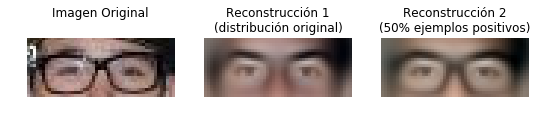

In [7]:

figure, axis = pyplot.subplots(1, 3, figsize=(9,2))

for number in 0, 1, 2:
    axis[number].axis('off')
    
axis[1].set_title("Reconstrucción 1\n(distribución original)")
axis[1].imshow(reconstructed_unbalanced)

axis[2].set_title("Reconstrucción 2\n(50% ejemplos positivos)")
axis[2].imshow(reconstructed_balanced)

axis[0].set_title("Imagen Original\n")
axis[0].imshow(orig_image)
